In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df_extracted_aod055 = pd.read_csv(r'../data/df_extracted_aod055.csv')
del(df_extracted_aod055['row'])
del(df_extracted_aod055['col'])
del(df_extracted_aod055['tile_id'])

gdf_openaq = gpd.read_file('../data/gdf_openaq.gpkg')
print('gdf_openaq has been loaded.')
if gdf_openaq.index.name is None:
    gdf_openaq = gdf_openaq.set_index('measurement_id')

gdf_openaq has been loaded.


In [25]:
gdf_openaq = gdf_openaq[gdf_openaq['value'] != -999].copy()

In [20]:
df_extracted_aod055 = df_extracted_aod055[df_extracted_aod055['aod_055'] >= 0].copy()

In [26]:
df_joined = df_extracted_aod055.merge(gdf_openaq, how='inner', left_on='measurement_id', right_index=True).copy()
df_joined

,measurement_id,aod_055,aod_datetime,locationId,location,parameter,value,unit,country,city,isMobile,isAnalysis,entity,sensorType,lat,long,datetime,year,month,geometry
0,4127,185.0,2019-12-11 03:40:00+00:00,8893,Vientiane,pm25,32.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,17.896122,102.640000,2019-12-11 04:00:00+00:00,2019,12,POINT (102.64000 17.89612)
1,4128,185.0,2019-12-11 03:40:00+00:00,8893,Vientiane,pm25,32.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,17.896122,102.640000,2019-12-11 03:00:00+00:00,2019,12,POINT (102.64000 17.89612)
2,12436,63.0,2021-01-10 07:10:00+00:00,8893,Vientiane,pm25,9.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,17.896122,102.640000,2021-01-10 08:00:00+00:00,2021,1,POINT (102.64000 17.89612)
3,12437,63.0,2021-01-10 07:10:00+00:00,8893,Vientiane,pm25,8.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,17.896122,102.640000,2021-01-10 07:00:00+00:00,2021,1,POINT (102.64000 17.89612)
6,66393,241.0,2021-06-14 03:50:00+00:00,225639,"City Hall, Narathiwat",pm25,11.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,6.426853,101.823388,2021-06-14 04:00:00+00:00,2021,6,POINT (101.82339 6.42685)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,39388,266.0,2021-05-20 03:50:00+00:00,225666,"Phayao Provincial, Phayao",pm25,18.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,19.200226,99.893048,2021-05-20 03:00:00+00:00,2021,5,POINT (99.89305 19.20023)
61985,45181,368.0,2021-05-20 03:50:00+00:00,225579,Yupparaj Wittayalai School,pm25,19.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,18.790933,98.990000,2021-05-20 04:00:00+00:00,2021,5,POINT (98.99000 18.79093)
61986,45182,368.0,2021-05-20 03:50:00+00:00,225579,Yupparaj Wittayalai School,pm25,19.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,18.790933,98.990000,2021-05-20 03:00:00+00:00,2021,5,POINT (98.99000 18.79093)
62036,3671,121.0,2019-12-30 07:15:00+00:00,8893,Vientiane,pm25,17.0,µg/m³,TH,None,False,None,Governmental Organization,reference grade,17.896122,102.640000,2019-12-30 08:00:00+00:00,2019,12,POINT (102.64000 17.89612)


<Axes: xlabel='aod_055', ylabel='value'>

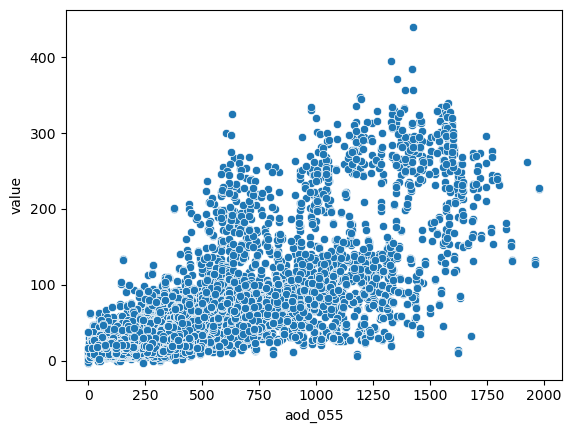

In [27]:
sns.scatterplot(data=df_joined, x='aod_055', y='value')